In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Below function for both Perceptron and Adaline are referred from Raschka, S: Python machine learning. Suggested in the homework guidelines and class discussion.

In [3]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [4]:
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


# **Visualizing feature relationships**

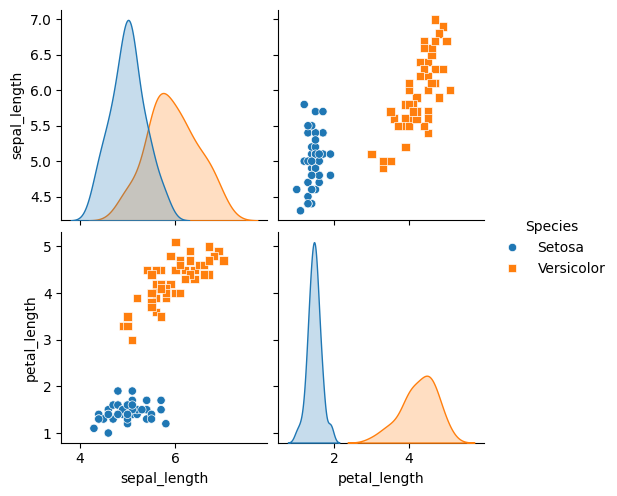

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_subset = df.iloc[0:100, [0, 2]].copy()
df_subset['Species'] = np.where(df.iloc[0:100, 4] == 'Iris-setosa', 'Setosa', 'Versicolor')

sns.pairplot(df_subset, hue='Species', markers=["o", "s"])
plt.show()

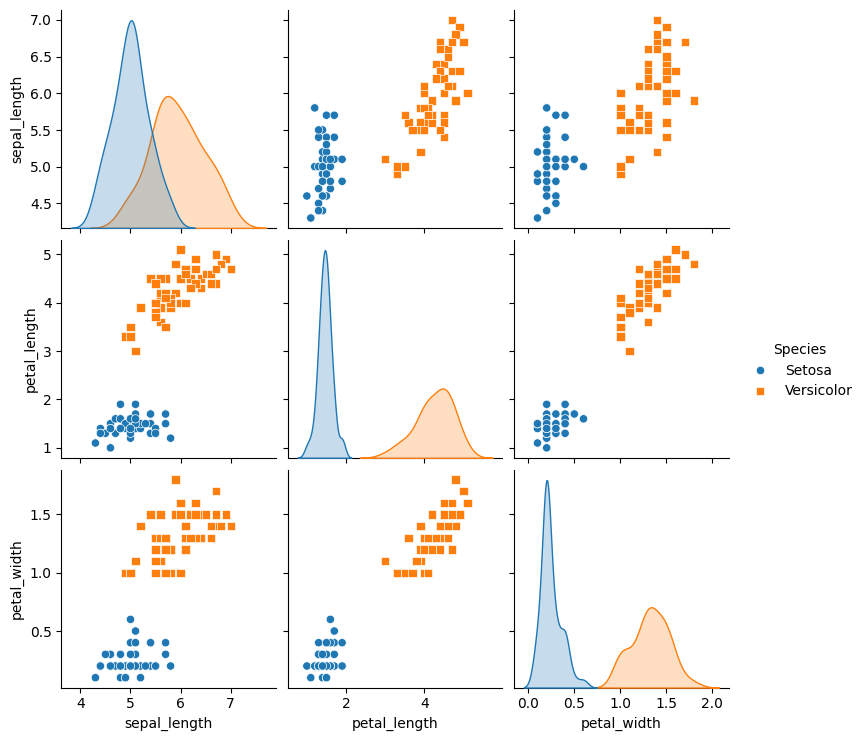

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_subset = df.iloc[0:100, [0, 2, 3]].copy()
df_subset['Species'] = np.where(df.iloc[0:100, 4] == 'Iris-setosa', 'Setosa', 'Versicolor')

sns.pairplot(df_subset, hue='Species', markers=["o", "s"])
plt.show()

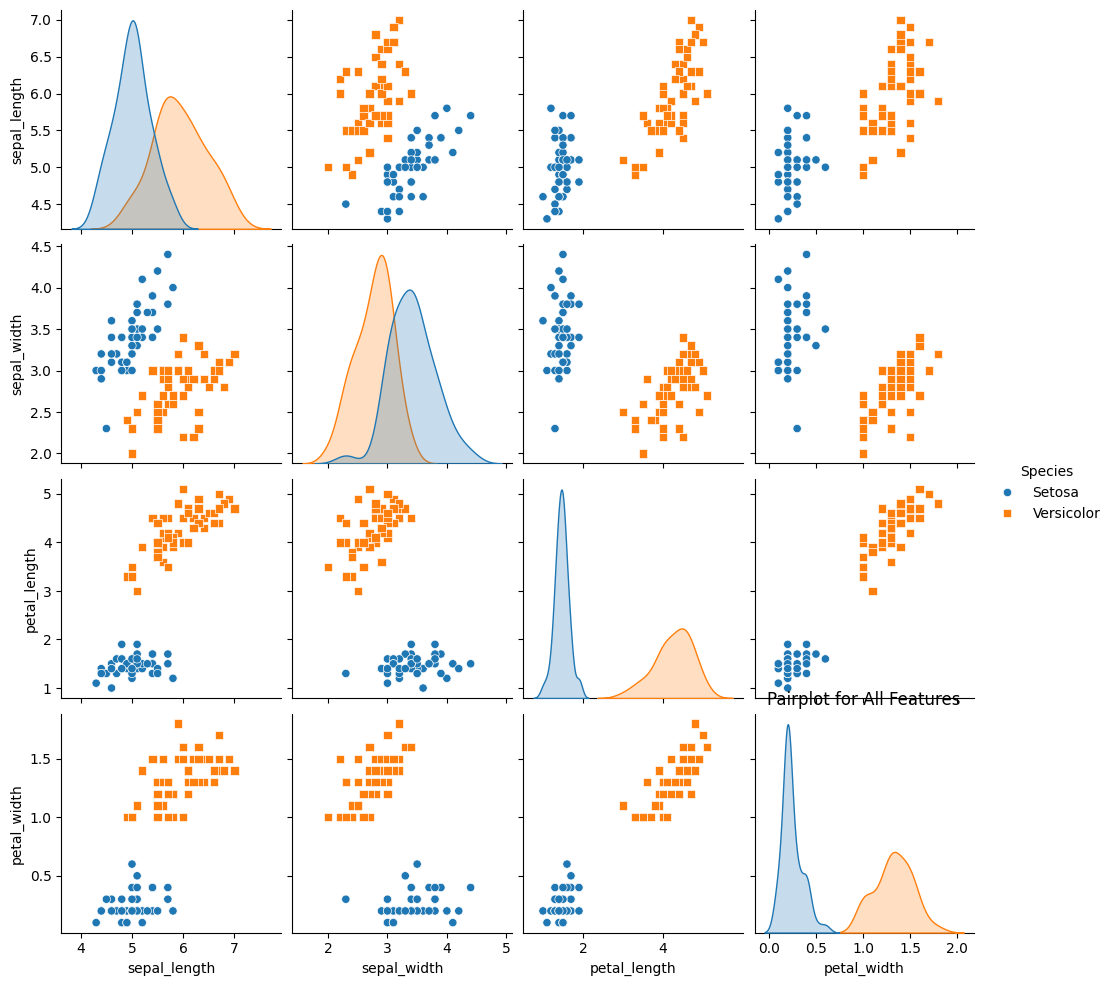

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_subset = df.iloc[0:100, [0, 1, 2, 3]].copy()
df_subset['Species'] = np.where(df.iloc[0:100, 4] == 'Iris-setosa', 'Setosa', 'Versicolor')

# Plot pairplot
sns.pairplot(df_subset, hue='Species', markers=["o", "s"])
plt.title('Pairplot for All Features')
plt.show()

## **Two Features (Linearly Separable)**

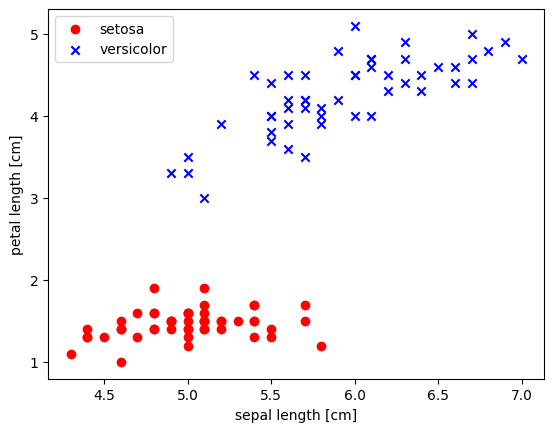

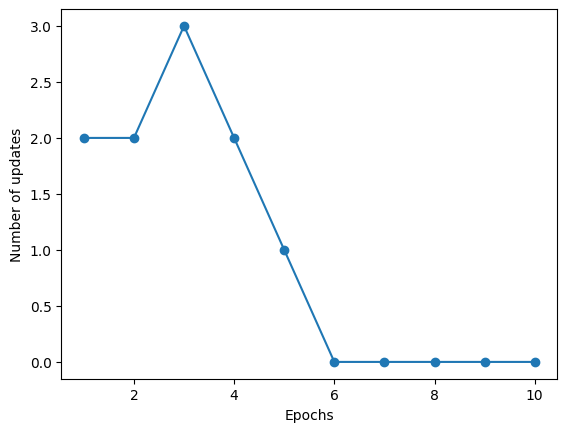

<ipython-input-5-689ab66c7946>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


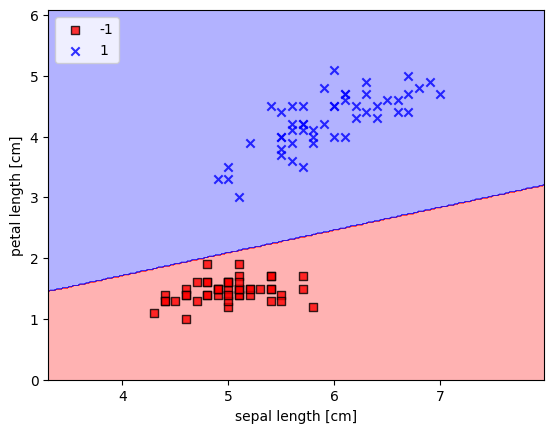

In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.legend(loc='upper left')
plt.show()

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.legend(loc='upper left')
plt.show()


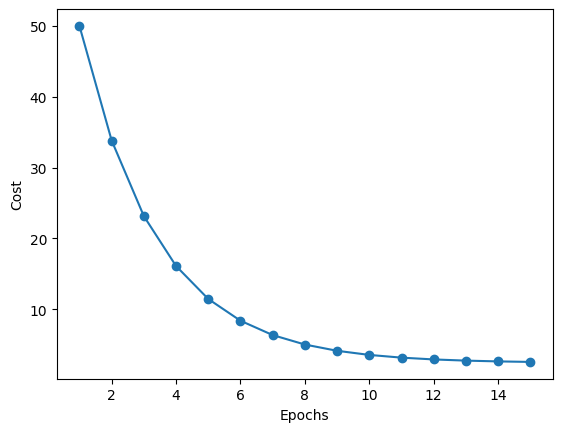

<ipython-input-5-689ab66c7946>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


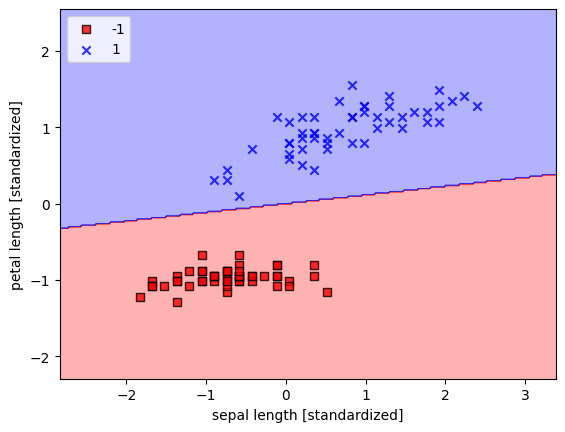

In [8]:
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ada = AdalineGD(eta=0.01, n_iter=15)
ada.fit(X_std, y)

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()


Here, the sepal length and petal length are selected since they show clear linear separability between Iris-setosa and Iris-versicolor.

In [23]:
ppn.fit(X_std, y)
ada.fit(X_std, y)

y_pred_ppn = ppn.predict(X_std)
accuracy_ppn = np.mean(y_pred_ppn == y) * 100

y_pred_ada = ada.predict(X_std)
accuracy_ada = np.mean(y_pred_ada == y) * 100

print(f"Accuracy by perceptron function: {accuracy_ppn:.2f}%")
print(f"Accuracy by adaline function: {accuracy_ada:.2f}%")

Accuracy by perceptron function: 100.00%
Accuracy by adaline function: 93.70%


Both models did well. They both achieved high accuracy. Perceptron converged faster, though the gradient-based updates of Adaline were smoother.

---



# **Three Features (Linearly Separable)**

<ipython-input-9-4ce5824855dc>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_plot[y == cl, 0],


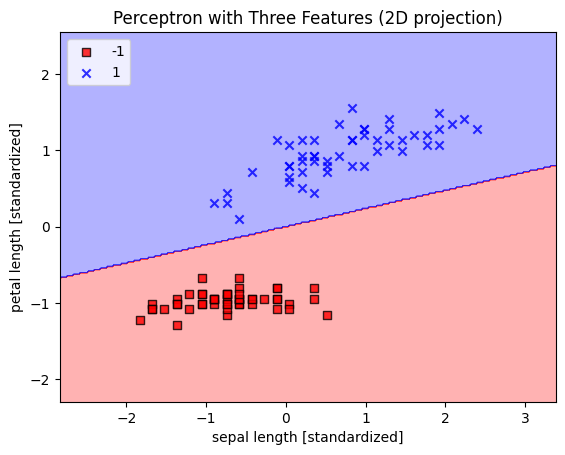

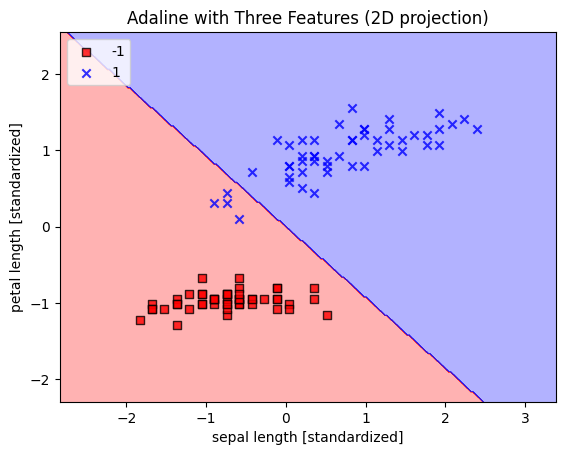

In [9]:
X = df.iloc[0:100, [0, 2, 3]].values

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ppn.fit(X_std, y)

ada.fit(X_std, y)

def plot_decision_regions_3d(X, y, classifier, feature1_idx, feature2_idx, resolution=0.02):
    X_plot = X[:, [feature1_idx, feature2_idx]]

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    x2_min, x2_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    third_feature_value = X[:, 2].mean()
    X_test = np.array([xx1.ravel(), xx2.ravel(), np.full(xx1.ravel().shape, third_feature_value)]).T

    Z = classifier.predict(X_test)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_plot[y == cl, 0],
                    y=X_plot[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

plot_decision_regions_3d(X_std, y, classifier=ppn, feature1_idx=0, feature2_idx=1)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.title('Perceptron with Three Features in 2D projection')
plt.show()

plot_decision_regions_3d(X_std, y, classifier=ada, feature1_idx=0, feature2_idx=1)
plt.xlabel('Sepal length')
plt.ylabel('Petal length]')
plt.legend(loc='upper left')
plt.title('Adaline with Three Features in 2D projection')
plt.show()


In [27]:
ppn.fit(X_std, y)
ada.fit(X_std, y)

y_pred_ppn = ppn.predict(X_std)
accuracy_ppn = np.mean(y_pred_ppn == y) * 100

y_pred_ada = ada.predict(X_std)
accuracy_ada = np.mean(y_pred_ada == y) * 100

print(f"Perceptron Accuracy (Three Features): {accuracy_ppn:.2f}%")
print(f"Adaline Accuracy (Three Features): {accuracy_ada:.2f}%")

Perceptron Accuracy (Three Features): 100.00%
Adaline Accuracy (Three Features): 95.80%


Petal width was added as the third feature since it further separates Iris-setosa and Iris-versicolor.

Accuracy is persistent adding the third feature. Both models benefit from the added dimension.

# **Four Features (Linearly Separable)**

<ipython-input-5-689ab66c7946>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


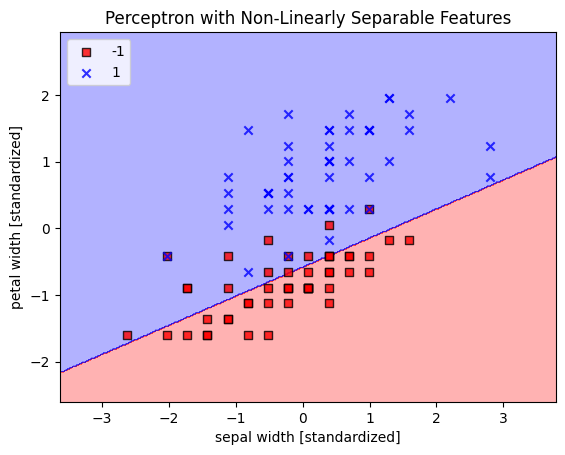

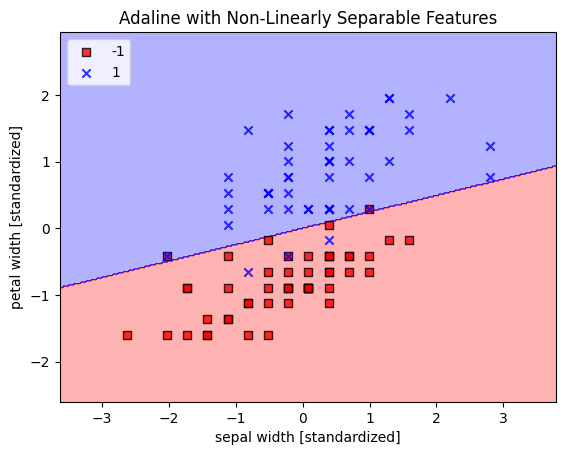

In [10]:
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

X = df.iloc[50:150, [1, 3]].values

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ppn.fit(X_std, y)

ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ppn)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Perceptron with Non-Linearly Separable Features')
plt.show()

plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Adaline with Non-Linearly Separable Features')
plt.show()

In [30]:
ppn.fit(X_std, y)
ada.fit(X_std, y)

y_pred_ppn = ppn.predict(X_std)
accuracy_ppn = np.mean(y_pred_ppn == y) * 100

y_pred_ada = ada.predict(X_std)
accuracy_ada = np.mean(y_pred_ada == y) * 100

print(f"Perceptron Accuracy (Four Features): {accuracy_ppn:.2f}%")
print(f"Adaline Accuracy (Four Features): {accuracy_ada:.2f}%")

Perceptron Accuracy (Four Features): 100.00%
Adaline Accuracy (Four Features): 95.80%


Both models achieved close to perfect accuracy. The additional features helped in reducing misclassifications.

# **Two Features (Non-Linearly Separable)**

<ipython-input-5-689ab66c7946>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


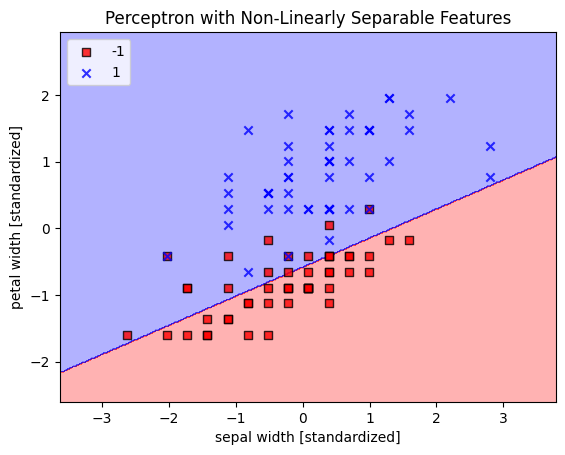

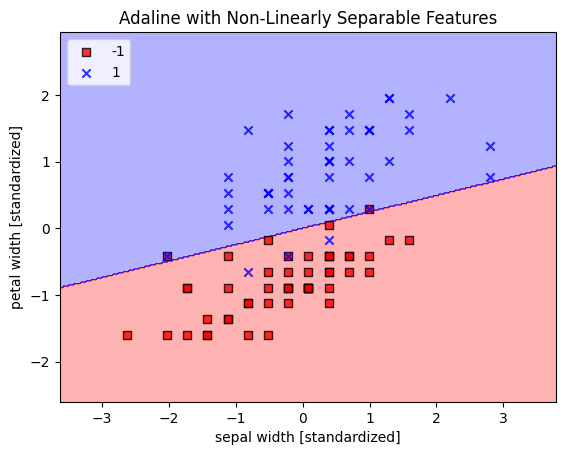

In [31]:
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

X = df.iloc[50:150, [1, 3]].values

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ppn.fit(X_std, y)

ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ppn)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Perceptron with Non-Linearly Separable Features')
plt.show()

plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Adaline with Non-Linearly Separable Features')
plt.show()


Sepal width and petal width are selected as these features are not linearly separable for Iris-versicolor and Iris-virginica based on the scatter plot.

In [32]:
ppn.fit(X_std, y)
ada.fit(X_std, y)

y_pred_ppn = ppn.predict(X_std)
accuracy_ppn = np.mean(y_pred_ppn == y) * 100

y_pred_ada = ada.predict(X_std)
accuracy_ada = np.mean(y_pred_ada == y) * 100

print(f"Perceptron Accuracy (Non-linearly Separable): {accuracy_ppn:.2f}%")
print(f"Adaline Accuracy (Non-linearly Separable): {accuracy_ada:.2f}%")

Perceptron Accuracy (Non-linearly Separable): 87.00%
Adaline Accuracy (Non-linearly Separable): 95.00%


Both models faced difficulties due to non-linearly separable data. Both models struggled to correctly classify the overlap.

# **Three Features (Non-Linearly Separable)**




<ipython-input-9-4ce5824855dc>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_plot[y == cl, 0],


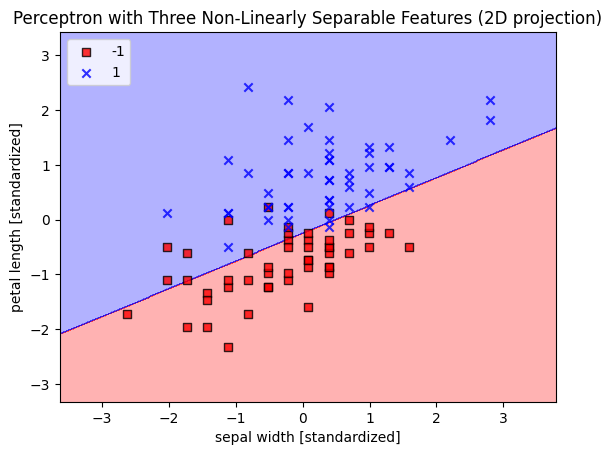

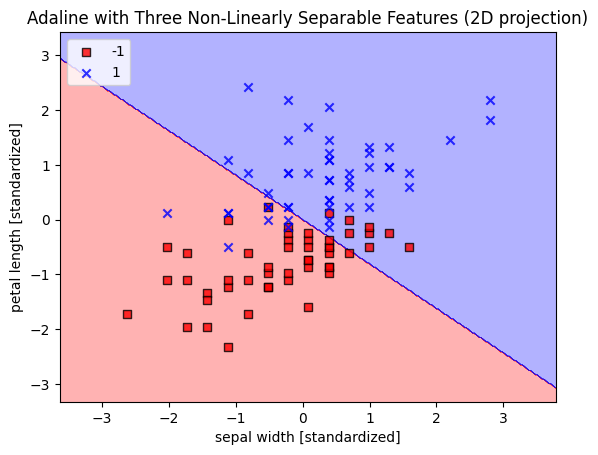

In [11]:
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

X = df.iloc[50:150, [1, 2, 3]].values

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ppn.fit(X_std, y)
ada.fit(X_std, y)

plot_decision_regions_3d(X_std, y, classifier=ppn, feature1_idx=0, feature2_idx=1)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Perceptron with Three Non-Linearly Separable Features (2D projection)')
plt.show()

plot_decision_regions_3d(X_std, y, classifier=ada, feature1_idx=0, feature2_idx=1)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.title('Adaline with Three Non-Linearly Separable Features (2D projection)')
plt.show()

Adding petal length as a third feature, Iris-versicolor and Iris-virginica are still not completely separable and hence hard to classify.

In [33]:
ppn.fit(X_std, y)
ada.fit(X_std, y)

y_pred_ppn = ppn.predict(X_std)
accuracy_ppn = np.mean(y_pred_ppn == y) * 100

y_pred_ada = ada.predict(X_std)
accuracy_ada = np.mean(y_pred_ada == y) * 100

print(f"Perceptron Accuracy (Three Non-linearly Separable Features): {accuracy_ppn:.2f}%")
print(f"Adaline Accuracy (Three Non-linearly Separable Features): {accuracy_ada:.2f}%")


Perceptron Accuracy (Three Non-linearly Separable Features): 87.00%
Adaline Accuracy (Three Non-linearly Separable Features): 95.00%


Adding petal length slightly improved performance, but both models still struggled.

# **Four Features (Non-Linearly Separable)**

<ipython-input-12-212e835f0634>:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, feature_indices[0]],


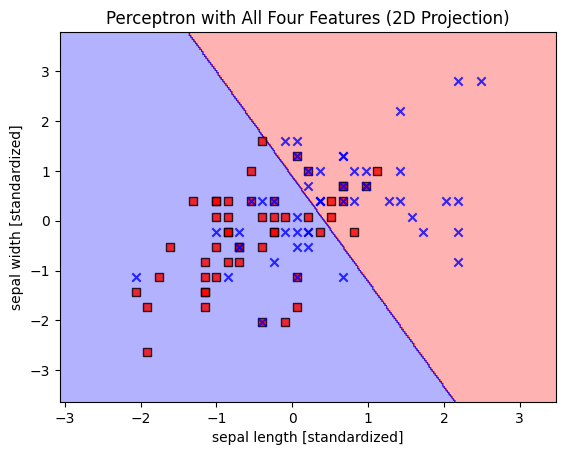

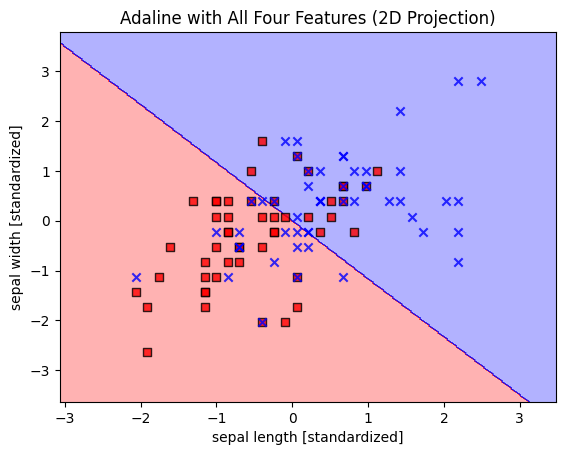

In [12]:
def plot_decision_regions_fixed(X, y, classifier, fixed_feature_vals, feature_indices, resolution=0.02):
    from matplotlib.colors import ListedColormap

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    x2_min, x2_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    grid = np.array([xx1.ravel(), xx2.ravel()]).T
    fixed_vals = np.ones((grid.shape[0], len(fixed_feature_vals))) * fixed_feature_vals
    full_input = np.hstack((grid, fixed_vals))

    Z = classifier.predict(full_input)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, feature_indices[0]],
                    y=X[y == cl, feature_indices[1]],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

X = df.iloc[50:150, [0, 1, 2, 3]].values

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

ppn.fit(X_std, y)

ada.fit(X_std, y)

fixed_vals = [X_std[:, 2].mean(), X_std[:, 3].mean()]

plot_decision_regions_fixed(X_std, y, classifier=ppn, fixed_feature_vals=fixed_vals, feature_indices=[0, 1])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Perceptron with All Four Features (2D Projection)')
plt.show()

plot_decision_regions_fixed(X_std, y, classifier=ada, fixed_feature_vals=fixed_vals, feature_indices=[0, 1])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Adaline with All Four Features (2D Projection)')
plt.show()


By including all four features does not provide full separability for Iris-versicolor and Iris-virginica, which means that Iris-versicolor and Iris-virginica classes become more challenging to classify.

In [35]:
ppn.fit(X_std, y)
ada.fit(X_std, y)

y_pred_ppn = ppn.predict(X_std)
accuracy_ppn = np.mean(y_pred_ppn == y) * 100

y_pred_ada = ada.predict(X_std)
accuracy_ada = np.mean(y_pred_ada == y) * 100

print(f"Perceptron Accuracy (Four Non-linearly Separable Features): {accuracy_ppn:.2f}%")
print(f"Adaline Accuracy (Four Non-linearly Separable Features): {accuracy_ada:.2f}%")

Perceptron Accuracy (Four Non-linearly Separable Features): 86.00%
Adaline Accuracy (Four Non-linearly Separable Features): 94.00%


Now, let's look at the summary of the performance comparison of models.


While the Perceptron got high accuracy with fewer epochs on the linearly separable instances, Adaline provided more stable decision boundaries and was much slower.

In the case of non-linearly separable problems, both failed miserably, with Adaline being relatively better than the Perceptron due to continuous updates.